# Spike Challenge Precios
## Camila Diaz Cifuentes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga y Análisis de datos 

In [ ]:
prec = pd.read_csv("precipitaciones.csv")
prec = prec.assign(year=lambda x: x.date.apply(lambda value: value.split("-")[0]),
                   month=lambda x: x.date.apply(lambda value: value.split("-")[1]),
                   day=lambda x: x.date.apply(lambda value: value.split("-")[2]))
prec.year.unique()
prec.month.unique()
prec.day.unique()
prec.describe()

Con respecto al archivo **precipitaciones.csv** no se observan anomalías ni inconsistencias que salten notoriamente a la vista, y como es de esperarse en regiones ubicadas al sur del pais se presenta un aumento en los valores con respecto a las regiones ubicadas en la zona norte.

In [76]:
bc = pd.read_csv("banco_central.csv")
bc = bc.assign(date=lambda x: x.Periodo.apply(lambda value: value.split(" ")[0]),
               year=lambda x: x.date.apply(lambda value: value.split("-")[0]),
               month=lambda x: x.date.apply(lambda value: value.split("-")[1]),
               day=lambda x: x.date.apply(lambda value: value.split("-")[2]))
bc.year.unique()
bc.month.unique()
bc.day.unique()
bc.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,613.000000,613.000000,172.000000,253.000000,253.000000,453.000000,157.000000,145.000000
mean,578.706574,54.202123,215.337558,5.055426,63.673202,43.066137,88.528822,26694.082759
std,468.018646,89.493857,68.625224,8.580500,29.704824,28.014437,36.772454,7170.231956
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,292.540000,4.760000,162.447500,2.863800,39.930000,20.100000,54.888000,23701.000000
50%,385.040000,6.080000,200.340000,3.885100,59.370000,30.390000,88.043000,27912.000000
75%,828.800000,35.080000,286.392500,5.930000,79.270000,59.800000,110.738000,31800.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


Con respecto al archivo **banco_central.csv** se detectan varias anomalías, la más notoria es el formato de cerca del 90% de las columnas, el cual muestra los valores con puntos posicionales de miles. Sin embargo, no en todos esos casos se observa el mismo comportamiento, en algunos casos se presentan casi como puntos decimales y en otros casos aparece el valor *a*, además de la no existencia de datos en algunas casillas. Otro elemento erróneo detectado fue la existencia de un registro con mes 13 y un par de registros duplicados.

Para todos los casos previamente indicados se realizó una limpieza, primero dejando fuera el registro del mes 13, y posteriormente ajustando todas las columnas donde no se pudo obtener un valor numérico, eliminando los puntos posicionales y rearmando el número final. Para poder soportar los casos donde no existia una valor (nan) o donde el valor era *a*, se ejecuto el ajuste en un try-except, y en cada caso que no fuese posible ejecutar la lógica de corrección, se dejó sin valor (nan).

In [77]:
#Limpieza
#Archivo banco_central presenta un registro con mes 13
bc = bc.loc[lambda x: x.month != '13'].drop_duplicates()

#Multiples columnas con punto posicional o con string "a"
def fix_positional_point(value):
   try:
      return int("".join(value.split(".")))
   except:
      return np.nan

columns_to_fix = ["Imacec_empalmado","Imacec_produccion_de_bienes","Imacec_minero","Imacec_industria","Imacec_resto_de_bienes","Imacec_comercio","Imacec_servicios",
                  "Imacec_a_costo_de_factores","Imacec_no_minero","PIB_Agropecuario_silvicola","PIB_Pesca","PIB_Mineria","PIB_Mineria_del_cobre","PIB_Otras_actividades_mineras",
                  "PIB_Industria_Manufacturera","PIB_Alimentos","PIB_Bebidas_y_tabaco","PIB_Textil","PIB_Maderas_y_muebles","PIB_Celulosa","PIB_Refinacion_de_petroleo","PIB_Quimica",
                  "PIB_Minerales_no_metalicos_y_metalica_basica","PIB_Productos_metalicos","PIB_Electricidad","PIB_Construccion","PIB_Comercio","PIB_Restaurantes_y_hoteles","PIB_Transporte",
                  "PIB_Comunicaciones","PIB_Servicios_financieros","PIB_Servicios_empresariales","PIB_Servicios_de_vivienda","PIB_Servicios_personales","PIB_Administracion_publica",
                  "PIB_a_costo_de_factores","Impuesto_al_valor_agregado","Derechos_de_Importacion","PIB","Precio_de_la_gasolina_en_EEUU_dolaresm3",
                  "Precio_del_cobre_refinado_BML_dolareslibra","Precio_del_kerosene_dolaresm3","Tipo_de_cambio_del_dolar_observado_diario","Ocupados",
                  "Ocupacion_en_Agricultura_INE","Ocupacion_en_Explotacion_de_minas_y_canteras_INE","Ocupacion_en_Industrias_manufactureras_INE",
                  "Ocupacion_en_Suministro_de_electricidad_INE","Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE",
                  "Ocupacion_en_Actividades_profesionales_INE","Ocupacion_en_Actividades_inmobiliarias_INE","Ocupacion_en_Actividades_financieras_y_de_seguros_INE",
                  "Ocupacion_en_Informacion_y_comunicaciones_INE","Ocupacion_en_Transporte_y_almacenamiento_INE","Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE",
                  "Ocupacion_en_Construccion_INE","Ocupacion_en_Comercio_INE","Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE",
                  "Ocupacion_en_Administracion_publica_y_defensa_INE","Ocupacion_en_Enseanza_INE","Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE",
                  "Ocupacion_en_Actividades_artisticas_INE","Ocupacion_en_Otras_actividades_de_servicios_INE","Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE",
                  "Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE","No_sabe__No_responde_Miles_de_personas","Tipo_de_cambio_nominal_multilateral___TCM",
                  "Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100","Indice_de_produccion_industrial","Indice_de_produccion_industrial__mineria",
                  "Indice_de_produccion_industrial_electricidad__gas_y_agua","Indice_de_produccion_industrial__manufacturera","Generacion_de_energia_electrica_CDEC_GWh",
                  "Indice_de_ventas_comercio_real_IVCM","Indice_de_ventas_comercio_real_no_durables_IVCM","Indice_de_ventas_comercio_real_durables_IVCM"]

for column in columns_to_fix:
   bc[column] = bc[column].apply(fix_positional_point)


## Visualización
### Series históricas de precipitaciones

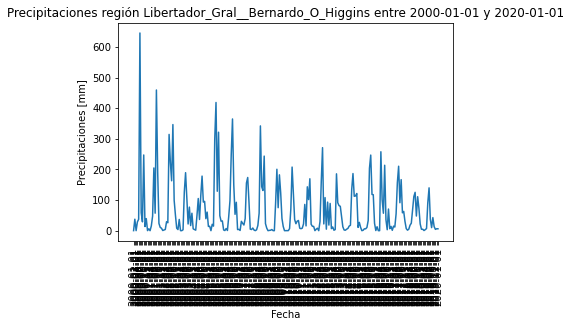

In [37]:
def get_precipitation_plot(region, start_date, end_date):
    if region not in prec.columns:
        print(f"Region {region} no se encuentra en los datos.")
        return
    
    if start_date not in prec.date.values:
        print(f"Fecha de inicio {start_date} no se encuentra en los datos.")
        return

    if end_date not in prec.date.values:
        print(f"Fecha de fin {end_date} no se encuentra en los datos.")
        return

    region_data = prec[["date",region]].sort_values("date").reset_index()
    region_data = region_data.loc[lambda x: x.date >= start_date].loc[lambda x: x.date <= end_date]

    plt.plot(region_data["date"], region_data[region])
    plt.title(f"Precipitaciones región {region} entre {start_date} y {end_date}")
    plt.ylabel("Precipitaciones [mm]")
    plt.xlabel("Fecha")
    plt.xticks(rotation=90)
    plt.show()

get_precipitation_plot("Libertador_Gral__Bernardo_O_Higgins","2000-01-01","2020-01-01")

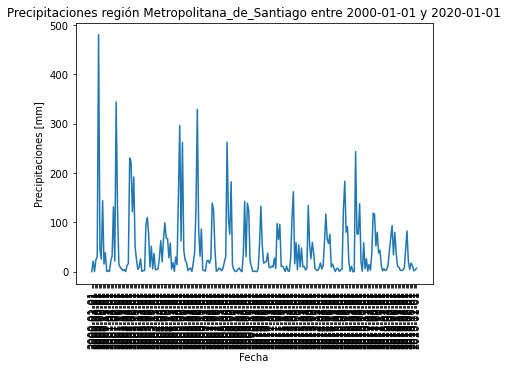

In [176]:
get_precipitation_plot("Metropolitana_de_Santiago","2000-01-01","2020-01-01")

### ¿Qué observas con respecto a estacionalidades y tendencias?
Con respecto a la estacionalidad esta se puede observar notoriamente por la gran diferencia de precipitaciones, y a su vez también es posible observar como las precipitaciones han ido disminuyendo consistentemente en los últimos años y donde la diferencia entre temporadas de verano e invierno ya no son tan marcadas como antes.

### Series mensuales de precipitaciones

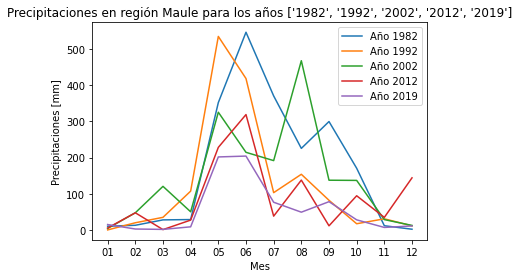

In [38]:
def get_precipitation_time_series(years, region):
    
    region_series_data = prec[["year","month",region]].sort_values(["year","month"]).reset_index()
    region_series_data = region_series_data.loc[lambda x: x.year.isin(years)]

    for year, region_year_data, in region_series_data.groupby("year"):
        plt.plot(region_year_data["month"], region_year_data[region], label=f"Año {year}")

    plt.title(f"Precipitaciones en región {region} para los años {years}")
    plt.ylabel("Precipitaciones [mm]")
    plt.xlabel("Mes")
    plt.legend()
    plt.show()

get_precipitation_time_series(["1982", "1992", "2002", "2012","2019"],"Maule")

### ¿Qué puedes concluir de estos gráficos?
Similar al análisis anterior, es posible notar que los meses de primavera-verano son los que menos precipitaciones poseen, a diferencias de los meses que otoño-invierno. A su vez, también es fácil notar como en los últimos años las lineas se han ido aplanando cada vez más, donde ya en el año 2019 la mayor cantidad de precipitaciones es menos de la mitad de las cantidades máximas alcanzadas hace más de 20 años.

### Series históricas de PIB

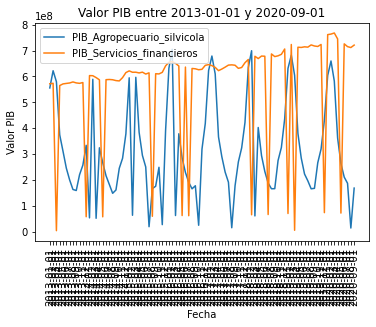

In [79]:
def get_pib_series(pib_series, start_date, end_date):
    
    pib_series_data = bc[["date"] + pib_series].sort_values("date").reset_index()
    pib_series_data = pib_series_data.loc[lambda x: x.date >= start_date].loc[lambda x: x.date <= end_date]

    for pib in pib_series:
        plt.plot(pib_series_data["date"], pib_series_data[pib], label=f"{pib}")

    plt.title(f"Valor PIB entre {start_date} y {end_date}")
    plt.ylabel("Valor PIB")
    plt.xlabel("Fecha")
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

get_pib_series(["PIB_Agropecuario_silvicola", "PIB_Servicios_financieros"], "2013-01-01", "2020-09-01")

### ¿Qué puedes decir de cada serie en particular? ¿Hay alguna relación entre estas dos series?
Con respecto a la serie del PIB Agropecuario Silvicola, se puede apreciar que ésta posee mucha variabilidad, a diferencia de la serie PIB Servicios Financieras, que se observa mucho mas estable, fuera de los casos puntuales de menor valor. En general, no se aprecia una relación directa entre ambas series fuera de que los rangos de valores máximos son cercanos.

## Tratamiento
### ¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se tienen que correlacionar para entrenar un modelo? ¿Mucha correlación, no correlacionadas, da igual?
Para poder evaluar la correlación se podría utilizar una matriz de correlación. Sobre el nivel de correlación necesario para un modelo, en general debería depender del modelo a trabajar, ya que en algunos casos variables muy correlacionados no correlacionadas podrian no estar aportando realmente información de importancia al modelo, y podrian generar confusión en los procesos de análisis. Creo que la mejor opción es ir por variables que aporten al modelo e idealmente que dichas variables sean evaluadas correctamente como por ejemplo ejecutando un PCA al conjunto de datos.

### Preparación de datos para modelo

In [103]:
milk_price = pd.read_csv("precio_leche.csv")

month_dict = {"Ene":"01", "Feb":"02", "Mar":"03", "Abr":"04", "May":"05", "Jun":"06", "Jul":"07", "Ago":"08", "Sep":"09", "Oct":"10", "Nov":"11", "Dic":"12"}

milk_price = milk_price.assign(month=lambda x: x.Mes.apply(lambda value: month_dict[value]),
                               date=lambda x: x.apply(lambda row: f"{row.Anio}-{row.month}-01", axis=1)
                               )

data_to_model = milk_price[["date","Precio_leche"]].drop_duplicates().merge(prec).merge(bc)

#pd.set_option('display.max_rows', None)
#data_to_model.isna().apply( lambda x: x.sum()*100/613)
                               

## Por tema de tiempo, agrego algunos comentarios sobre los pasos pendientes.

Tras cruzar todos los datos, se detecta que dada la cantidad de datos nulos en el archivo banco_central, es necesario realizar correcciones a dicha información, seleccionando de forma más específica las columnas a utilizar en el modelo, y posteriormente ajustando los casos finales de nulos, ya sea mediante un fillna con el promedio de cada columna o con algun cálculo más acorde al de cada columna en particular.

Para la etapa del modelo, tras el ajuste de datos ya se podría trabajar con información 100% válida para el modelo. 
Para el proceso de cross-validation utilizaria StratifiedShuffleSplit, esperando la cantidad de registros totales no cambiara mucho, probaría con un test_size de 0.25 y unos 4 a 5 splits. Quizas hasta evaluar el uso de GridSearchCV para encontrar valores mas ajustados a los parámetros de MLPRegressor.

